In [4]:
import zipfile
import requests
import shutil
from pathlib import Path

In [5]:
data_path = Path("data/")
image_path = data_path / "Aircraft Pictures"

if (not image_path.is_dir()):
  print(f"There is no {image_path} directory, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

  """
  with open(data_path / "Pics.zip", "wb") as f:
    request = requests.get("https://github.com/FireBoyAJ24/Airplane-Type-Detection-System/raw/Collecting-Images/data/Pics.zip")
    print("Downloading Airplane images files")
    
    f.write(request.content)
  """

  with zipfile.ZipFile(data_path / "Pics.zip", "r") as zip_ref:
    print("Unzipping Aircraft pictures...")
    zip_ref.extractall(image_path)
  


There is no data/Aircraft Pictures directory, creating one...
Unzipping Aircraft pictures...


In [6]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

target_directory = "data/Aircraft Pictures/Aircraft Pictures"


class_found_names = list()

for entry in list(os.scandir(target_directory)):
  class_found_names.append(entry.name)

class_names = sorted(class_found_names)

class_to_idx = {cls_name: i for i, cls_name in enumerate(class_names)}

class_names, class_to_idx



(['A-10A Thunderbolt II',
  'A-37A Dragonfly',
  'A-37A DragonflyAC-130A Spectre',
  'ADM-20 Quail',
  'Airbus 350',
  'Airbus A300',
  'Airbus A380',
  'Airbus Beluga',
  'Airbus BelugaXL',
  'B-17G Flying Fortress',
  'B-1B Lancer',
  'B-29B Superfortress',
  'B-52D Stratofortress',
  'Boeing 777',
  'Boeing 787',
  'C-119C Flying Boxcar',
  'C-123K Provider',
  'C-124C Globemaster II',
  'C-130E Hercules',
  'C-141C Starlifter',
  'C-46D Commando',
  'C-47B Skytrain',
  'C-54G Skymaster',
  'C-7A Caribou',
  'CH-21B Workhorse',
  'EC-121K Constellation',
  'EC-135N Stratotanker',
  'F-100D Super Sabre',
  'F-101F Voodoo',
  'F-102A Delta Dagger',
  'F-105D Thunderchief',
  'F-106A Delta Dart',
  'F-111E Aardvark',
  'F-15A Eagle',
  'F-16A Fighting Falcon',
  'F-4D Phantom II',
  'F-80C Shooting Star',
  'F-84E Thunderjet',
  'F-86H Sabre',
  'F-89J Scorpion',
  'HH-43F Huskie',
  'KC-97L Stratofreighter',
  'MH-53M Pave Low',
  'P-40N Warhawk',
  'P-51H Mustang',
  'SR-71A Blackbir

In [7]:
def make_standard_image_dir(class_names, num_images):
  # Make a directory called database
  data_path = Path("data/")
  main_path = data_path / "database"
  train_path = main_path / "train"
  test_path = main_path / "test"

  if (main_path.is_dir()):
    print("The main directory", main_path, "Exists")
  else:
    main_path.mkdir(parents=True)

    train_path.mkdir(parents=True)
    test_path.mkdir(parents=True)
  
  """
  1. Scan Aircraft Pictures/Aircraft names
  2. Make a new path for each aircraft names in train and test
  3. Copy the first 10 images to train and then the last 10 images to test
  """
  source_directory = Path("data/Aircraft Pictures/Aircraft Pictures")
  
  print("Standardising the data....")

  # Copying images into a standard image directory organisation
  for p in range(len(class_names)):
    class_directory = source_directory / class_names[p]
    
    for n in range(1, num_images + 1):
      image_path = (str(n) + ".jpg")
      image_source_path = class_directory.joinpath(image_path)
      des_test_class_directory = test_path / class_names[p]
      des_train_class_directory = train_path / class_names[p]
      
      if (n < int(num_images/2)):
        
        if (des_train_class_directory.is_dir() != True):         
          des_train_class_directory.mkdir(parents=True)
        
        plane_desc_path = train_path.joinpath(class_names[p])
        image_desc_path = plane_desc_path.joinpath(image_path)
        
        shutil.copy(image_source_path, image_desc_path)
      else:

        if (des_test_class_directory.is_dir() != True):         
          des_test_class_directory.mkdir(parents=True)
        
        plane_desc_path = test_path.joinpath(class_names[p])
        image_desc_path = plane_desc_path.joinpath(image_path)
        
        shutil.copy(image_source_path, image_desc_path)

  

In [8]:
make_standard_image_dir(class_names, 20)

Standardising the data....


In [9]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
import os
 
main_path = Path("data/database")
train_path = main_path / "train"
test_path = main_path / "test"

In [10]:
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

In [11]:
train_data = datasets.ImageFolder(root=train_path,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_path,
                                  transform=data_transform,
                                  target_transform=None)

print(f"Train data:\n {train_data}\nTest data:\n{test_data}")

Train data:
 Dataset ImageFolder
    Number of datapoints: 450
    Root location: data/database/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 550
    Root location: data/database/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [12]:
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ff05be63d00>,
 <torch.utils.data.dataloader.DataLoader at 0x7ff05be63f40>)

Creating the TinyVGG model class

In [13]:
from torch import device
from torch import nn

In [14]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes))
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=50, bias=True)
  )
)

## Test a forward pass for a single image

In [15]:
image_batch, label_batch = next(iter(train_dataloader))

image_single, label_single = image_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {image_single.shape}\n")

model_0.eval()
with torch.inference_mode():
  pred = model_0(image_single)


print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")


Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[ 0.0487,  0.0514,  0.0460, -0.0302, -0.0341,  0.0368, -0.0520,  0.0805,
          0.0097,  0.0712, -0.0442, -0.0231, -0.0097, -0.0186,  0.0454,  0.0053,
          0.0193,  0.0220,  0.0210,  0.0413, -0.0041, -0.0332,  0.0484, -0.0162,
          0.0418,  0.0761,  0.0143,  0.0373, -0.0063, -0.0530,  0.0239,  0.0836,
          0.0076, -0.0856, -0.0135, -0.0063, -0.0420, -0.0317,  0.0321, -0.0091,
          0.0317, -0.0508,  0.0336,  0.0423, -0.0195,  0.0011,  0.0633,  0.0567,
          0.0354,  0.0308]])

Output prediction probabilities:
tensor([[0.0207, 0.0208, 0.0207, 0.0192, 0.0191, 0.0205, 0.0188, 0.0214, 0.0199,
         0.0212, 0.0189, 0.0193, 0.0196, 0.0194, 0.0207, 0.0199, 0.0201, 0.0202,
         0.0202, 0.0206, 0.0197, 0.0191, 0.0207, 0.0194, 0.0206, 0.0213, 0.0200,
         0.0205, 0.0196, 0.0187, 0.0202, 0.0215, 0.0199, 0.0181, 0.0195, 0.0196,
         0.0189, 0.0191, 0.0204, 0.0196, 0.0204, 0.0188, 0.0204,

In [16]:
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 50]                   --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

## Creating train and test loops

In [17]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  # Put model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)

  return train_loss, train_acc



In [18]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  model.eval()

  test_loss, test_acc = 0, 0

  with torch.inference_mode():

    for batch, (X, y) in enumerate(dataloader):

      test_pred_logits = model(X)

      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y)).sum().item()/len(test_pred_labels)
    
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [19]:
from tqdm.auto import tqdm

In [20]:
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
  
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []
  }
  
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)
    
    print(
        f"Epoch: {epoch+1} | "
        f"train_loss: {train_loss:.4f} | "
        f"train_acc: {train_acc:.4f} | "
        f"test_loss: {test_loss:.4f} | "
        f"test_acc: {test_acc:.4f}"
    )
  
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

In [44]:
torch.manual_seed(42)

NUM_EPOCHS = 100

model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes))

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 3.9503 | train_acc: 0.0167 | test_loss: 3.9144 | test_acc: 0.0191
Epoch: 2 | train_loss: 3.9171 | train_acc: 0.0229 | test_loss: 3.9124 | test_acc: 0.0191
Epoch: 3 | train_loss: 3.9143 | train_acc: 0.0187 | test_loss: 3.9118 | test_acc: 0.0191
Epoch: 4 | train_loss: 3.9125 | train_acc: 0.0187 | test_loss: 3.9121 | test_acc: 0.0243
Epoch: 5 | train_loss: 3.9118 | train_acc: 0.0187 | test_loss: 3.9120 | test_acc: 0.0243
Epoch: 6 | train_loss: 3.9122 | train_acc: 0.0146 | test_loss: 3.9117 | test_acc: 0.0191
Epoch: 7 | train_loss: 3.9077 | train_acc: 0.0563 | test_loss: 3.9113 | test_acc: 0.0266
Epoch: 8 | train_loss: 3.9103 | train_acc: 0.0187 | test_loss: 3.9114 | test_acc: 0.0191
Epoch: 9 | train_loss: 3.9101 | train_acc: 0.0167 | test_loss: 3.9097 | test_acc: 0.0208
Epoch: 10 | train_loss: 3.8981 | train_acc: 0.0333 | test_loss: 3.9065 | test_acc: 0.0243
Epoch: 11 | train_loss: 3.8754 | train_acc: 0.0354 | test_loss: 3.9222 | test_acc: 0.0370
Epoch: 12 | train_l

In [45]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [46]:
import matplotlib.pyplot as plt

In [49]:
def plot_loss_curves(results: Dict[str, List[float]]):
  loss = results['train_loss']
  test_loss = results['test_loss']

  accuracy = results['train_acc']
  test_accuracy = results['test_acc']

  epochs = range(len(results['train_loss']))

  plt.figure(figsize=(15, 7))
  
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label='train loss')
  plt.plot(epochs, test_loss, label='test loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label='train accuracy')
  plt.plot(epochs, test_accuracy, label='test accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

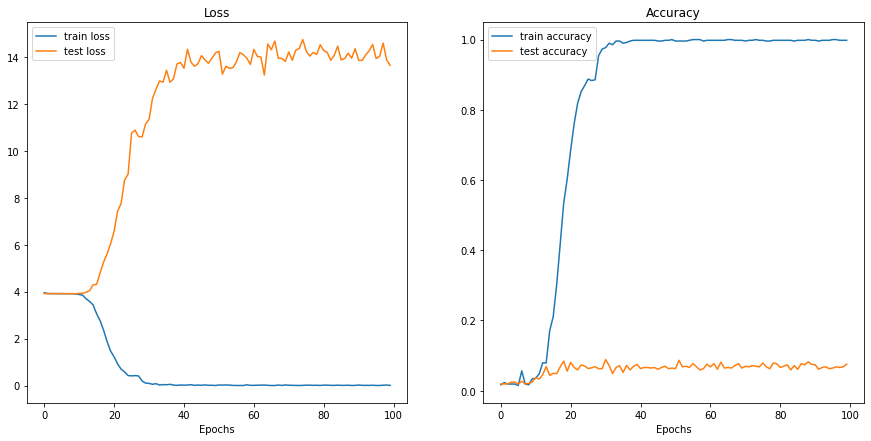

In [50]:
plot_loss_curves(model_0_results)

The model is both underfitting and over fitting

Overfitting
1. We can increase the number of images in each of the planes
2. We can add a pre trained model paramters and weights which can identify planes from other objects
3. We could have a learning rate decay to allow the model to reach a convergence

Underfitting
1. Add more layers to the model
2. Have more epochs
3. 